#NAMA  : AHMED FATHIR SYAFAAT
#KELAS : TI - 3H

## PRAKTIKUM

1. Buat Gamma Correction

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
import glob as glob

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


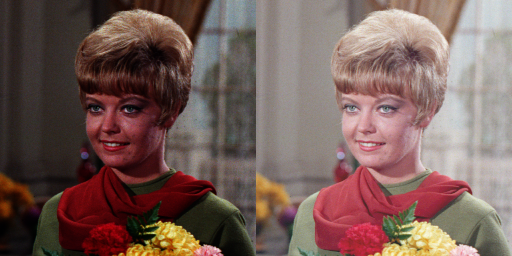

In [3]:
print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
 gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
 print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
gamma_correction = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      gamma_correction[y,x,c] = 255*(pow(original[y,x,c]/255, 1/gamma))


final_frame = cv.hconcat((original, gamma_correction))
cv2_imshow(final_frame)

2. Buat Simulasi Image Depth

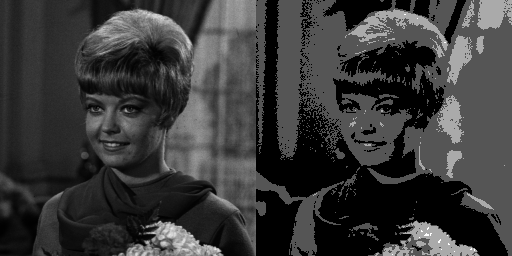

In [ ]:
bit_depth=2
level = 255 / (pow(2,bit_depth)-1)
original = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff',cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    depth_image[y,x] = round(original[y,x]/level)*level

final_frame = cv.hconcat((original, depth_image))
cv2_imshow(final_frame)

3. Buat modul Average Denoising

PSNR for 5 average: 27.53631146495656


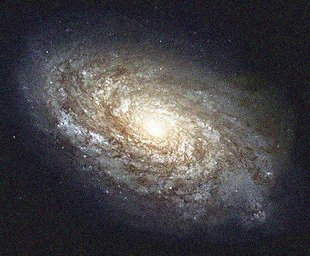

PSNR for 10 average: 27.555804113048477


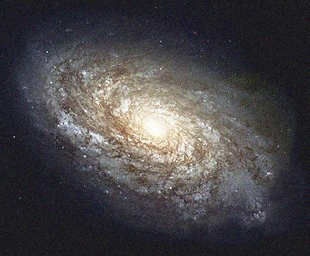

PSNR for 20 average: 27.510989144913157


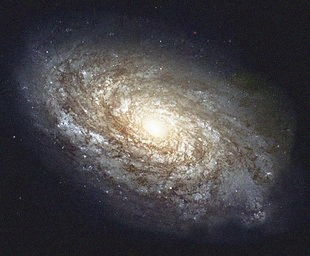

PSNR for 40 average: 27.453287399641845


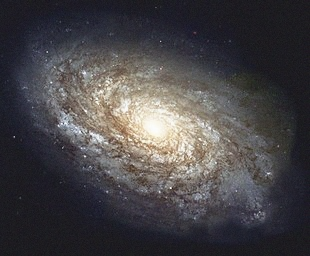

PSNR for 80 average: 27.401369430715363


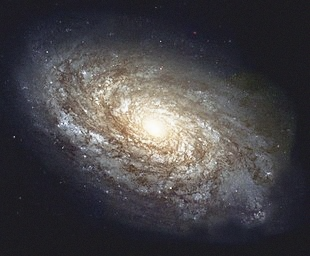

PSNR for 100 average: 27.370931279516654


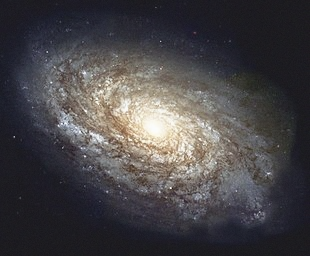

In [ ]:
cv_img =[]
img_original = cv.imread('/content/drive/MyDrive/PCVK/Images/galaxy.jpg')
for img in glob.glob('/content/drive/MyDrive/PCVK/Images/noises/*.jpg'):
  n = cv.imread(img)
  cv_img.append(n)

def PNSR(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return 100
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

def averageDenoising(index):
    denoised_image = np.zeros_like(cv_img[0], dtype=np.float32)
    for i in range(index):
        denoised_image += cv_img[i].astype(np.float32)

    return denoised_image / index

average_counts = [5, 10, 20, 40, 80, 100]

for count in average_counts:
    if count <= len(cv_img):
        denoised_image = averageDenoising(count)
        denoised_image = np.uint8(denoised_image)
        print(f'PSNR for {count} average: {PNSR(img_original, denoised_image)}')
        cv2_imshow(denoised_image)
    else:
        print(f'Not enough images for {count} average.')

Dari hasil PSNR yang anda catat pada tabel diatas, kesimpulan yang dapat diambil adalah...
> Semakin banyak gambar yang digunakan dalam proses denoising, kualitas gambar hasil denoising menjadi semakin baik.

4. Buat image masking

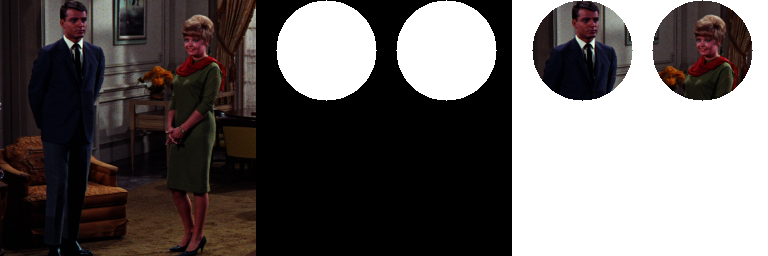

In [ ]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/couple.tiff')

mask = np.zeros(img.shape, img.dtype)

cv.circle(mask, center=(70, 50), radius=50, color=(255, 255, 255), thickness=cv.FILLED)
cv.circle(mask, center=(190, 50), radius=50, color=(255, 255, 255), thickness=cv.FILLED)

masked = cv.bitwise_and(img, mask)
whitebg = np.full(img.shape, 255, img.dtype)
res = np.where(mask != 0, masked, whitebg)
final_frame = cv.hconcat((img, mask, res))
cv2_imshow(final_frame)


5. Lakukan percobaan menggunakan operator lain

- NOT (komplemen)

Operator NOT


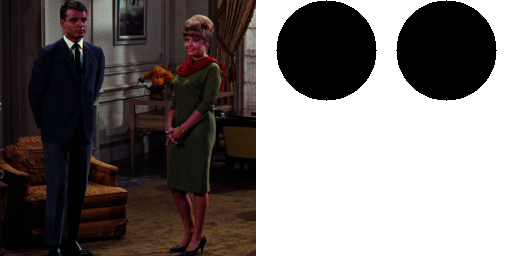

In [ ]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/couple.tiff')

mask = np.zeros(img.shape, img.dtype)

cv.circle(mask, center=(70, 50), radius=50, color=(255, 255, 255), thickness=cv.FILLED)
cv.circle(mask, center=(190, 50), radius=50, color=(255, 255, 255), thickness=cv.FILLED)

mask_not = cv.bitwise_not(mask)
final_frame = cv.hconcat((img, mask_not))

print('Operator NOT')
cv2_imshow(final_frame)


- OR (Atau)

Operator OR


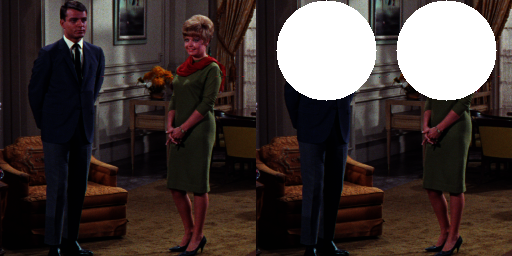

In [ ]:

img = cv.imread('/content/drive/MyDrive/PCVK/Images/couple.tiff')

mask = np.zeros(img.shape, img.dtype)

cv.circle(mask, center=(70, 50), radius=50, color=(255, 255, 255), thickness=cv.FILLED)
cv.circle(mask, center=(190, 50), radius=50, color=(255, 255, 255), thickness=cv.FILLED)

mask_or = cv.bitwise_or(img, mask)
final_frame = cv.hconcat((img, mask_or))

print('Operator OR')
cv2_imshow(final_frame)



- AND (Dan)

Operator AND


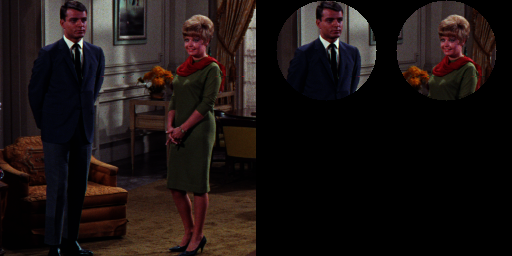

In [ ]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/couple.tiff')

mask = np.zeros(img.shape, img.dtype)

cv.circle(mask, center=(70, 50), radius=50, color=(255, 255, 255), thickness=cv.FILLED)
cv.circle(mask, center=(190, 50), radius=50, color=(255, 255, 255), thickness=cv.FILLED)

mask_and = cv.bitwise_and(img, mask)
final_frame = cv.hconcat((img, mask_and))

print('Operator AND')
cv2_imshow(final_frame)



- NAND (Not And)

Operator NAND


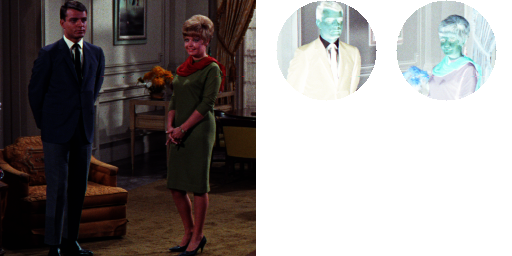

In [ ]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/couple.tiff')

mask = np.zeros(img.shape, img.dtype)

cv.circle(mask, center=(70, 50), radius=50, color=(255, 255, 255), thickness=cv.FILLED)
cv.circle(mask, center=(190, 50), radius=50, color=(255, 255, 255), thickness=cv.FILLED)

mask_and = cv.bitwise_and(img, mask)
mask_nand = cv.bitwise_not(mask_and)
final_frame = cv.hconcat((img, mask_nand))

print('Operator NAND')
cv2_imshow(final_frame)


- XOR (Exlusive Or)

Operator XOR


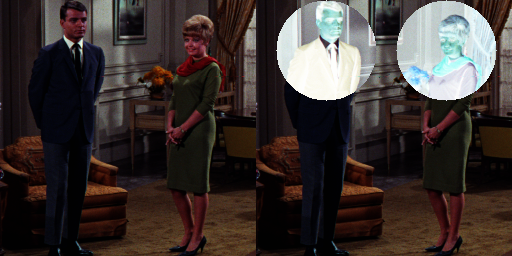

In [ ]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/couple.tiff')

mask = np.zeros(img.shape, img.dtype)

cv.circle(mask, center=(70, 50), radius=50, color=(255, 255, 255), thickness=cv.FILLED)
cv.circle(mask, center=(190, 50), radius=50, color=(255, 255, 255), thickness=cv.FILLED)

mask_xor = cv.bitwise_xor(img, mask)
final_frame = cv.hconcat((img, mask_xor))

print('Operator XOR')
cv2_imshow(final_frame)


Tuliskan hasil analisa anda kenapa citra keluarannya seperti itu...
> - Operator NOT : Menghasilkan inversi dari mask, di mana area dalam lingkaran menjadi hitam.
> - Operator OR : Menggabungkan gambar asli dan mask, menampilkan semua bagian dari kedua input dengan lingkaran putih.
> - Operator AND : Menampilkan hanya bagian gambar asli yang berada di dalam area mask, sementara area di luar menjadi hitam.
> - Operator NAND : Kebalikan dari AND, di mana area di dalam lingkaran menjadi hitam dan area di luar menampilkan gambar asli.
> - Operator XOR : Menampilkan bagian gambar asli yang tidak beririsan dengan mask, di mana area dalam lingkaran menjadi hitam.

## TUGAS

Gunakan image masking untuk mengambil bagian tertentu dari kartu identitas menggunakan fungsi yang telah Anda pelajari. Kemudian masing-masing simpan dalam nama image baru

- Kelompok 2 ambil bagian TTL dan Jenis Kelamin.

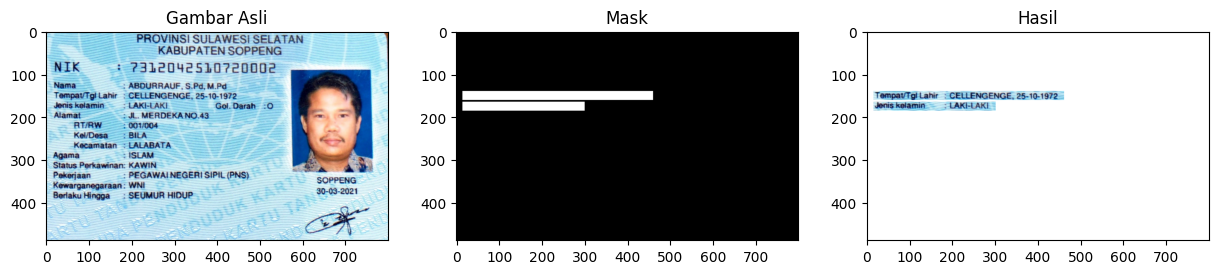

In [4]:
# Membaca gambar
img = cv.imread('/content/drive/MyDrive/PCVK/Images/KTP.jpg')

# Membuat mask kosong dengan ukuran yang sama dengan gambar asli
mask = np.zeros(img.shape, dtype=np.uint8)

# Membuat dua rectangle di mask
mask = cv.rectangle(mask, (15, 140), (460, 160), (255, 255, 255), -1)
mask = cv.rectangle(mask, (15, 165), (300, 185), (255, 255, 255), -1)

# Melakukan operasi bitwise_or antara gambar asli dan inversi dari mask
result_img = cv.bitwise_or(img, cv.bitwise_not(mask))

# Konversi gambar dari BGR ke RGB untuk ditampilkan dengan Matplotlib
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
mask = cv.cvtColor(mask, cv.COLOR_BGR2RGB)
result_img = cv.cvtColor(result_img, cv.COLOR_BGR2RGB)

# Menampilkan gambar secara terpisah menggunakan subplot
plt.figure(figsize=(15,5))

# Gambar asli
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title("Gambar Asli")

# Mask
plt.subplot(1, 3, 2)
plt.imshow(mask)
plt.title("Mask")

# Gambar hasil
plt.subplot(1, 3, 3)
plt.imshow(result_img)
plt.title("Hasil")

# Menampilkan semua gambar
plt.show()

Gambar KTP.jpg dibaca dan disimpan dalam variabel img. Sebuah mask berukuran sama dengan gambar diinisialisasi sebagai array hitam (nol), kemudian dua persegi panjang putih ditambahkan ke dalam mask untuk menunjukkan area yang akan diekstrak.